In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
from HelperAndMechanics import *
from matplotlib import cm
from ipywidgets import *
# Set Palatino as the default font
font = {'family': 'serif', 'serif': ['Palatino'], 'size': 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)

### Show dynamic of Alief Panvielov

In [2]:
"""
    Reads in necessary parameters from config.ini
"""
N,size,[] = read_config([],mode = 'chaos')

# Load from HDF5
with h5py.File('../data/SpringMassModel/MechanicalData/data_eta_05_uv.h5', 'r') as f:
    dA = f['dA'][:]
    u = f['u'][:]
    T = f['T'][:]
    v = f['v'][:]
    f.close()
N = T.shape[0]

In [3]:
#normalize data to 1
u = u
v = v
T = T
dA = dA

u_plot = u[:,50,50]/np.max(u)
v_plot = v[:,50,50]/np.max(v)
T_plot = T[:,50,50]/np.max(T)
dA_plot = dA[:,50,50]/np.max(dA)

t_au = np.linspace(0, 1, N)

Text(0.5, 1.0, 'Dynamic of Aliev-Panfielov Model')

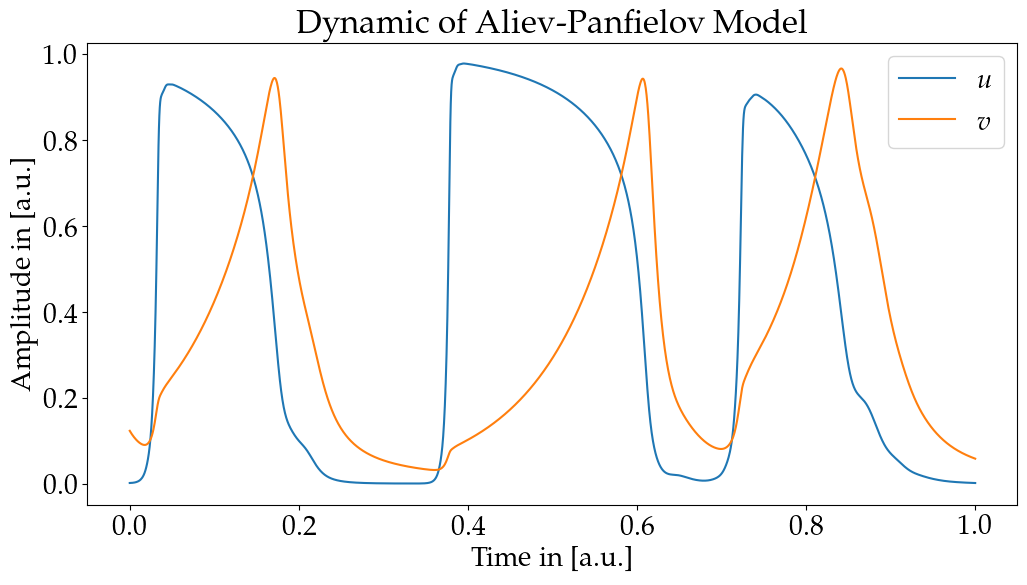

In [4]:
# Plotting
plt.figure(figsize=(12, 6)) 
# plt.plot(t_au,T_plot, label='$T_a$')
plt.plot(t_au,u_plot, label='$u$')
plt.plot(t_au,v_plot, label='$v$')
plt.xlabel('Time in [a.u.]')
plt.ylabel('Amplitude in [a.u.]')
plt.legend()
plt.title('Dynamic of Aliev-Panfielov Model')

# plt.savefig('../../figures/theory/AP_uv.png')

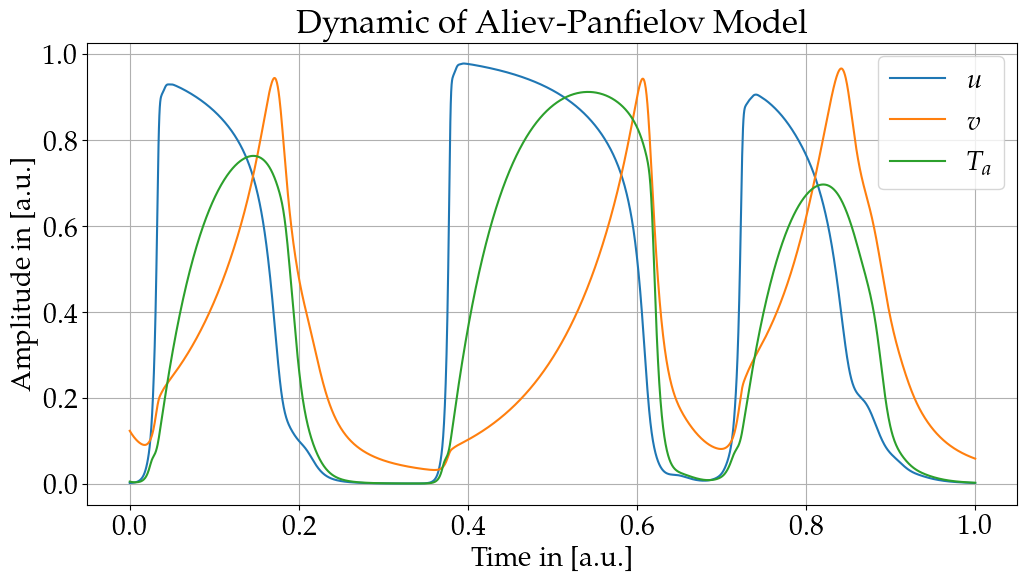

In [5]:
# Plotting
plt.figure(figsize=(12, 6)) 
plt.plot(t_au,u_plot, label='$u$')
plt.plot(t_au,v_plot, label='$v$')
plt.plot(t_au,T_plot, label='$T_a$')
plt.xlabel('Time in [a.u.]')
plt.ylabel('Amplitude in [a.u.]')
plt.legend()
plt.title('Dynamic of Aliev-Panfielov Model')
plt.grid()
# plt.savefig('../../figures/theory/AP_uvT.png')

In [6]:
dA[1].shape

(100, 100)

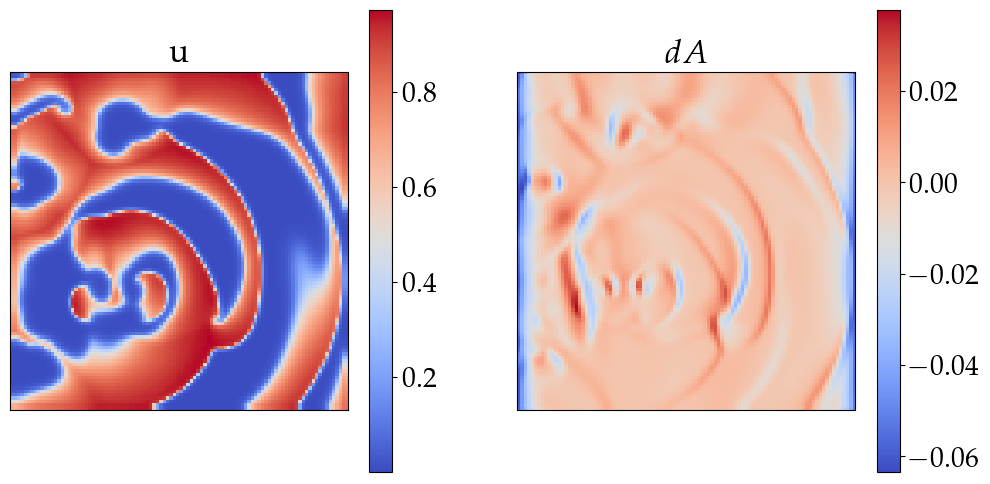

In [7]:

fig, ax = plt.subplots(1,2, figsize=(12, 6))
# Real eta0
im = ax[0].imshow(u[100], cmap='coolwarm')
ax[0].set_title('u')
ax[0].axes.xaxis.set_visible(False)
ax[0].axes.yaxis.set_visible(False)
fig.colorbar(im, ax=ax[0])

im = ax[1].imshow(dA[100], cmap='coolwarm')
ax[1].set_title('$dA$')
ax[1].axes.xaxis.set_visible(False)
ax[1].axes.yaxis.set_visible(False)
fig.colorbar(im, ax=ax[1])

# fig.suptitle('Reconstruction of Mechanical Volume Contraction by AdoptODE', fontsize=plt.rcParams['axes.titlesize'], fontweight='bold')
plt.savefig('../../figures/theory/AP_uv_dA.png',dpi=300)
plt.show()

In [8]:

plt.savefig('../../figures/theory/AP_in_MSD.png',dpi=300)

<Figure size 640x480 with 0 Axes>

## Results from full Domain

In [9]:
import h5py

def list_h5_structure(file_path):
    '''Recursively lists all groups, datasets, and attributes in an HDF5 file'''
    
    def print_structure(name, obj):
        indent = '  ' * name.count('/')
        if isinstance(obj, h5py.Group):
            print(f"{indent}📂 Group: {name}")
            # for key, value in obj.attrs.items():
            #     print(f"{indent}  └── 🏷️  Attribute: {key} = {value}")
        # elif isinstance(obj, h5py.Dataset):
            # print(f"{indent}📄 Dataset: {name} - shape: {obj.shape}, dtype: {obj.dtype}")
    
    with h5py.File(file_path, 'r') as f:
        print(f"📁 HDF5 File: {file_path}")
        f.visititems(print_structure)


In [10]:
import h5py
import numpy as np

def load_run(file_path, run):
    '''Reads the data and parameters from a saved HDF5 file'''
    
    data = {}  # Dictionary to store datasets
    params_dict = {}  # Dictionary to store parameters
    
    with h5py.File(file_path, 'r') as f:
        if run not in f:
            raise ValueError(f"Run '{run}' not found in file.")
        
        group = f[run]  # Access the group corresponding to the given 'run'
        
        # Load all datasets (convert to NumPy arrays)
        for key in ['u_sol', 'u', 'v_sol', 'v', 'T_sol', 'T', 'x_sol', 'x']:
            if key in group:
                data[key] = np.array(group[key])  # Convert dataset to NumPy array
        
        # Load parameter attributes from 'params_train' subgroup
        if "params_train" in group:
            params_group = group["params_train"]
            for key in params_group.attrs:
                params_dict[key] = params_group.attrs[key]  # Store as dictionary
    
    return data, params_dict


In [18]:
file_path = '../data/SpringMassModel/EtaSweep/FullDomain_len7lr20tol0.99keepdataTrue.h5'
run = 'run9'

list_h5_structure(file_path)

data, params_train = load_run(file_path, run)
# Accessing the datasets
u_sol = data['u_sol'][0]
u_sim = data['u'][0]
v_sol = data['v_sol'][0]
v_sim = data['v'][0]
T_sol = data['T_sol'][0]
T_sim = data['T'][0]
x_sol = data['x_sol'][0]
x_sim = data['x'][0]

# Accessing the parameters dictionary
print("Parameters:", params_train)

📁 HDF5 File: ../data/SpringMassModel/EtaSweep/FullDomain_len7lr20tol0.99keepdataTrue.h5
📂 Group: run0
  📂 Group: run0/params_train
📂 Group: run1
  📂 Group: run1/params_train
📂 Group: run2
  📂 Group: run2/params_train
📂 Group: run3
  📂 Group: run3/params_train
📂 Group: run4
  📂 Group: run4/params_train
📂 Group: run5
  📂 Group: run5/params_train
📂 Group: run6
  📂 Group: run6/params_train
📂 Group: run7
  📂 Group: run7/params_train
📂 Group: run8
  📂 Group: run8/params_train
📂 Group: run9
  📂 Group: run9/params_train
Parameters: {'D': np.float32(0.28938746), 'a': np.float32(0.06384624), 'c_a': np.float32(9.6260195), 'c_damp': np.float32(14.885857), 'delta_t_e': np.float32(0.08), 'epsilon_0': np.float32(0.00398), 'k': np.float32(7.9272604), 'k_T': np.float32(2.644431), 'k_a': np.float32(9.141748), 'k_a_pad': np.float32(23.0), 'k_ij': np.float32(13.472026), 'k_ij_pad': np.float32(23.0), 'k_j': np.float32(2.0), 'l_0': np.float32(1.0023533), 'm': np.float32(1.088701), 'mu_1': np.float32(0.24359

In [19]:

N,size,params = read_config(['D','a','k','epsilon_0','mu_1','mu_2','k_T','delta_t_e'
                             ,'k_T','k_ij','k_ij_pad','k_j','k_a','k_a_pad','c_a','m','c_damp',
                             'n_0','l_0','spacing'],mode = 'chaos')

keys =['D','a','k','epsilon_0','mu_1','mu_2','k_T','delta_t_e'
        ,'k_T','k_ij','k_ij_pad','k_j','k_a','k_a_pad','c_a','m','c_damp',
        'n_0','l_0','spacing']
tol = 0
params_true = dict(zip(keys,params))

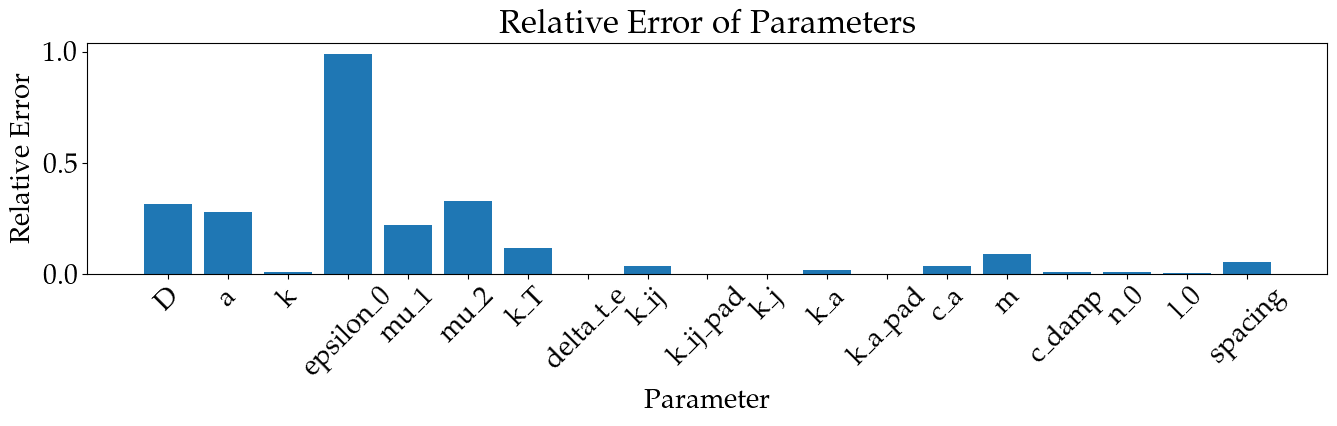

In [20]:
# Get the parameter names
param_names = list(params_true.keys())
# Calculate the relative error for each parameter
relative_errors = []

for param_name in param_names:
    
    real_value = params_true.get(param_name, np.nan)
    train_value = params_train.get(param_name, np.nan)
    if np.isnan(real_value) or np.isnan(train_value):
        relative_errors.append(np.nan)
    else:
        relative_error = np.abs((train_value - real_value) / real_value)
        relative_errors.append(relative_error)
# Plot the relative errors
plt.figure(figsize=(16, 3))
plt.bar(param_names, relative_errors)
plt.xlabel('Parameter')
plt.ylabel('Relative Error')
plt.title('Relative Error of Parameters')
plt.xticks(rotation=45)
plt.show()

In [ ]:
u_err = np.abs(u_sim-u_sol)
 
vmin,vmax =  0,1
pad = 10

# Function to update the plot
def update_plot(frame):
    fig, axes = plt.subplots(1, 2, figsize=(16, 4))  # Create 2 side-by-side subplots
    
    # Plot dA_fit
    im1 = axes[0].matshow(u_sol[frame], cmap='coolwarm', vmin=vmin, vmax=vmax)
    # im1 = axes[0].matshow(dA_rec[frame, pad:-pad, pad:-pad], cmap='coolwarm', vmin=vmin, vmax=vmax)
    axes[0].set_title(f"reconstruction")
    
    # Plot dA_sim
    im2 = axes[1].matshow(u_sim[frame], cmap='coolwarm', vmin=vmin, vmax=vmax)
    # im2 = axes[1].matshow(dA_sim[frame, pad:-pad, pad:-pad], cmap='coolwarm', vmin=vmin, vmax=vmax)
    axes[1].set_title(f"simulation")
    
    # Add colorbars
    fig.colorbar(im1, ax=axes[0])
    fig.colorbar(im2, ax=axes[1])

    plt.show()
def update_single_plot(frame):
    fig,axes = plt.subplots(1, 1, figsize=(10,8))

    # Plot dA_fit
    im1 = axes.matshow(u_err[frame], cmap='coolwarm', vmin=vmin, vmax=vmax)
    # im1 = axes.matshow(dA_err[frame, pad:-pad, pad:-pad], cmap='coolwarm', vmin=vmin, vmax=vmax)
    axes.set_title(f"dA error")

    # Add colorbars
    fig.colorbar(im1, ax=axes)

    plt.show()

# Create interactive slider
frame_slider = widgets.IntSlider(min=0, max=u_sim.shape[0]-1, step=1, value=0, description="Frame")

# Use interactive_output instead of interactive
out = widgets.interactive_output(update_plot, {'frame': frame_slider})

# Display slider and output
display(frame_slider, out)

IntSlider(value=0, description='Frame', max=6)

Output()

Text(0.5, 0.98, 'Reconstruction of Mechanical Volume Contraction by AdoptODE')

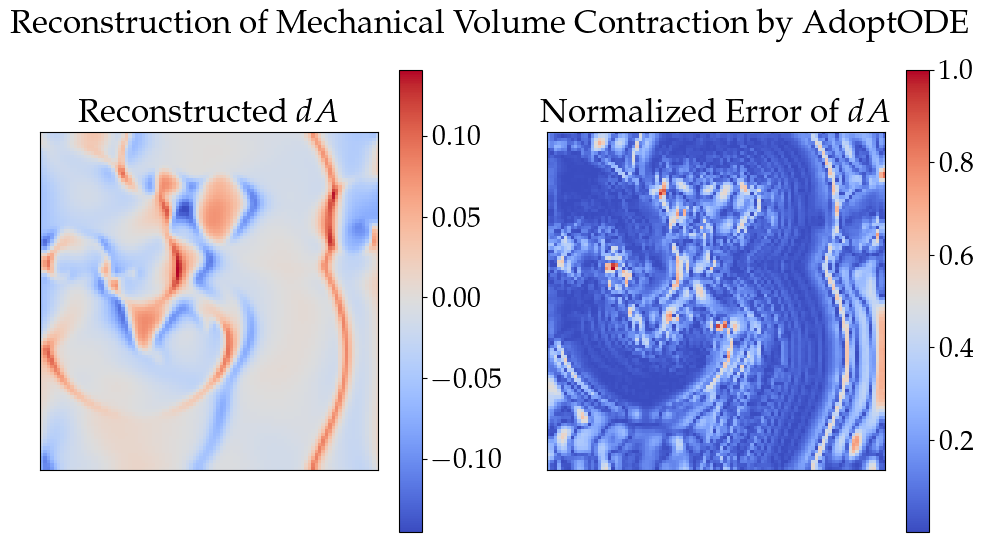

In [22]:
# Plotting
fig, ax = plt.subplots(1,2, figsize=(12, 6))
frame = 2
# Real eta0
dA_sol = compute_dA(x_sol,1)[:,pad:-pad,pad:-pad]
dA_sim = compute_dA(x_sim,1)[:,pad:-pad,pad:-pad]
dA_err = np.abs(dA_sim-dA_sol)
im = ax[0].imshow(dA_sim[frame], cmap='coolwarm')
ax[0].set_title('Reconstructed $dA$')
ax[0].axes.xaxis.set_visible(False)
ax[0].axes.yaxis.set_visible(False)
fig.colorbar(im, ax=ax[0])

im = ax[1].imshow(dA_err[frame]/np.max(dA_err[frame]), cmap='coolwarm')
ax[1].set_title('Normalized Error of $dA$')
ax[1].axes.xaxis.set_visible(False)
ax[1].axes.yaxis.set_visible(False)
fig.colorbar(im, ax=ax[1])

fig.suptitle('Reconstruction of Mechanical Volume Contraction by AdoptODE', fontsize=plt.rcParams['axes.titlesize'], fontweight='bold')

# plt.savefig('../../figures/results/reconstrunct_dA_full_domain.png',dpi=300)

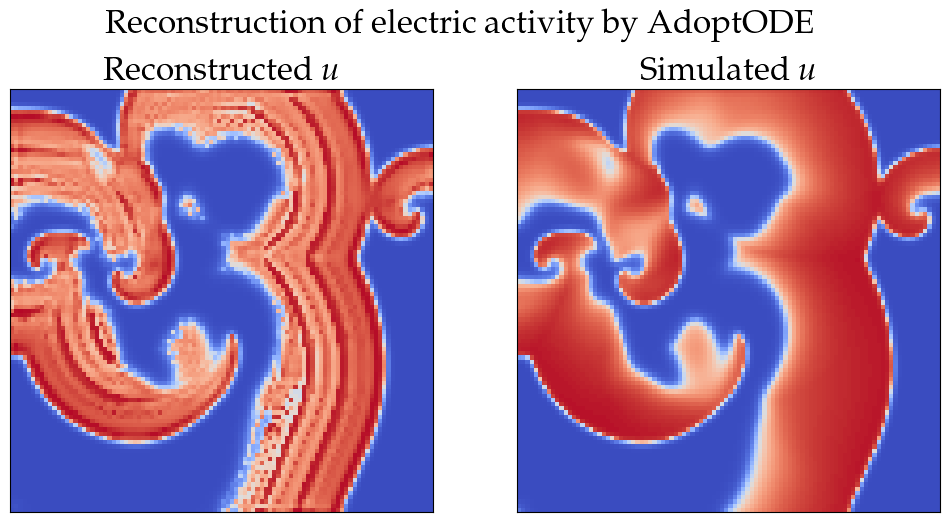

In [ ]:
# Plotting
fig, ax = plt.subplots(1,2, figsize=(12, 6))
frame = 2
# Real eta0
im = ax[0].imshow(u_sol[frame], vmin=0, vmax=1, cmap='coolwarm')
ax[0].set_title('Reconstructed $u$')
ax[0].axes.xaxis.set_visible(False)
ax[0].axes.yaxis.set_visible(False)
# fig.colorbar(im, ax=ax[0])

im = ax[1].imshow(u_sim[frame], vmin=0, vmax=1 , cmap='coolwarm')
ax[1].set_title('Simulated $u$')
ax[1].axes.xaxis.set_visible(False)
ax[1].axes.yaxis.set_visible(False)

# fig.colorbar(im, ax=ax[1])

fig.suptitle('Reconstruction of electric activity by AdoptODE', fontsize=plt.rcParams['axes.titlesize'], fontweight='bold')

# plt.savefig('../../figures/results/reconstrunct_u_full_domain.png',dpi=300)

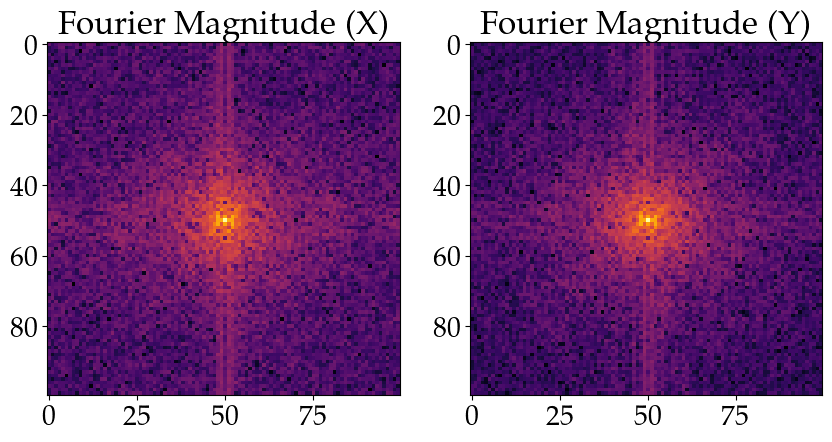

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Assume u_sol is already defined with shape (2, 100, 100)
# u_sol[0] contains x-coordinates, u_sol[1] contains y-coordinates

# Compute the 2D Fourier Transform for both x and y components
fft_x = np.fft.fft2(u_sol[0])
fft_y = np.fft.fft2(u_sol[1])

# Get the Fourier modes (magnitude spectrum)
magnitude_x = np.abs(fft_x)
magnitude_y = np.abs(fft_y)

# Shift zero-frequency component to the center for better visualization
magnitude_x = np.fft.fftshift(magnitude_x)
magnitude_y = np.fft.fftshift(magnitude_y)

# Plot the Fourier magnitude spectra
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(np.log(1 + magnitude_x), cmap='inferno')
axs[0].set_title("Fourier Magnitude (X)")

axs[1].imshow(np.log(1 + magnitude_y), cmap='inferno')
axs[1].set_title("Fourier Magnitude (Y)")

plt.show()


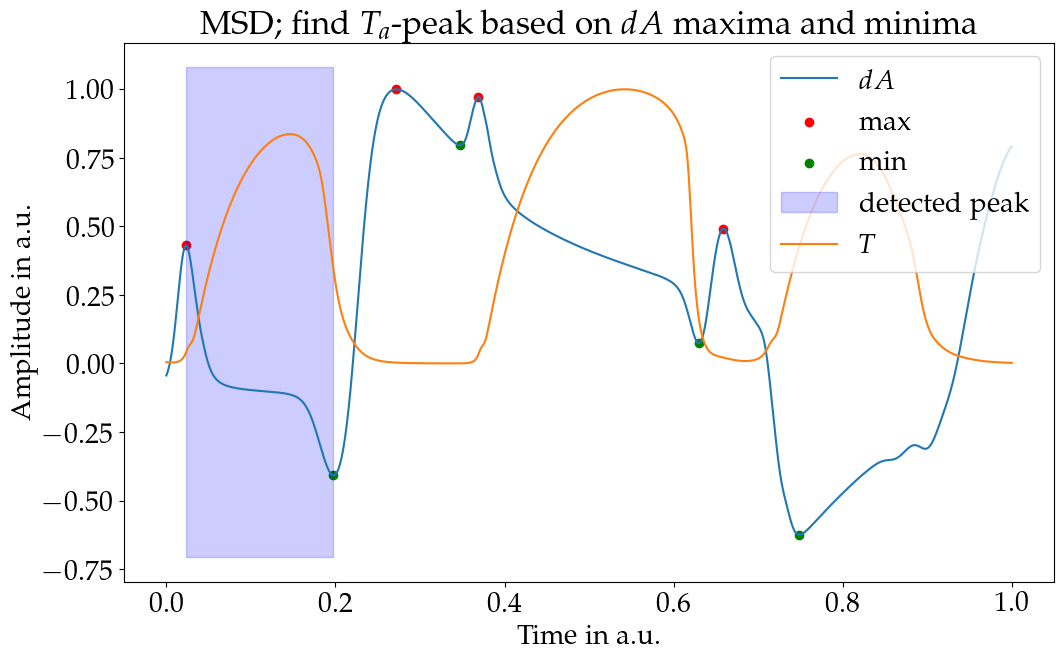

In [41]:
i,j = 50,50

dA_test = dA[:,i,j]
T_test = T[:,i,j]
maxima_temp0, _ = find_peaks(dA_test,prominence=.0007)#,height=.001
minima_temp0, _ = find_peaks(-dA_test,prominence=.0007)#,height=.001
max_indx, min_indx = index_finder(maxima_temp0, minima_temp0, dA_test,start_indx=0)


# Plotting
plt.figure(figsize=(12, 7))

# Line plot of dA_test
plt.plot(t_au,dA_test/np.max(dA_test), label="$dA$")

# Scatter plot for maxima (red) and minima (green)
plt.scatter(t_au[maxima_temp0], dA_test[maxima_temp0]/np.max(dA_test), c='r', label="max")
plt.scatter(t_au[minima_temp0], dA_test[minima_temp0]/np.max(dA_test), c='g', label="min")

# Get y-axis limits
y_min, y_max = plt.ylim()

# Fill entire y-direction between specified maximum and minimum indices
plt.fill_between(
    [(t_au[maxima_temp0[max_indx]]), (t_au[minima_temp0[min_indx]])],
    y_min,  # Fill from the bottom of the y-axis
    y_max,  # Fill to the top of the y-axis
    alpha=0.2,
    color='blue',
    label="detected peak"
)

# Plot scaled T_test
plt.plot(t_au,T_test / np.max(T_test), label="$T$")

# Add labels, legend, and grid
plt.xlabel("Time in a.u.")
plt.ylabel("Amplitude in a.u.")
plt.title("MSD; find $T_a$-peak based on $dA$ maxima and minima")
plt.legend(loc='upper right')
#plt.grid(alpha=0.5)


# plt.savefig('../../figures/Methods/MSD_peak_finder.png')
plt.show()


In [42]:
T_standard = np.load('../data/SpringMassModel/StandardPeaks/T_standard1.npy')
delta_t = .01
t_evals = np.linspace(0,N*delta_t,N)
t_standard = np.linspace(0,len(T_standard)*delta_t,len(T_standard))

t_start = maxima_temp0[max_indx]
t_stop = minima_temp0[min_indx]
t_peak_start = t_evals[maxima_temp0[max_indx]]
t_peak_stop = t_evals[minima_temp0[min_indx]]
t_evals_start = t_evals[maxima_temp0[max_indx]]

In [43]:
Delta_t_peak = t_peak_stop- t_peak_start
Delta_t_standard = len(T_standard)*delta_t

T_strecht, t_stretch = stretch_peak(Delta_t_peak, t_evals[t_start:t_stop], delta_t, T_standard, Delta_t_standard)
T_shifted = shift_peak(t_peak_start, t_evals_start, T_strecht)
print(len(T_strecht), len(t_stretch), len(T_shifted))   

2025-02-28 13:10:51.199182: W external/xla/xla/service/gpu/nvptx_compiler.cc:765] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.8.61). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


348 348 348


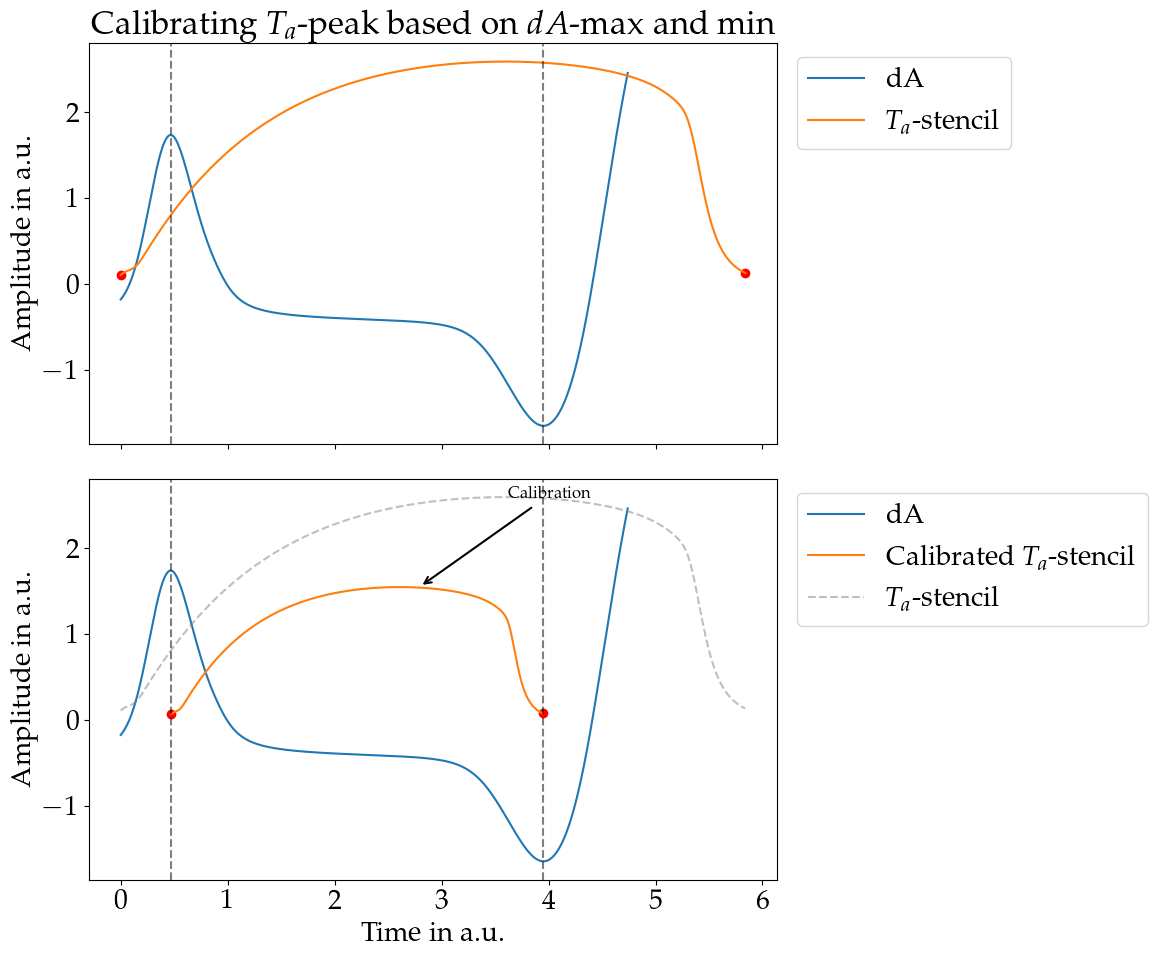

In [44]:

# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# First subplot
axes[0].plot(t_evals[0:minima_temp0[min_indx] + 80], dA_test[0:minima_temp0[min_indx] + 80] * 200, label='dA')
axes[0].plot(t_standard, T_standard, label='$T_a$-stencil')
axes[0].scatter([t_standard[0], t_standard[-1]], [T_standard[0], T_standard[-1]], c='r')
axes[0].axvline(x=t_evals[t_start], color='k', linestyle='--', alpha=0.5)
axes[0].axvline(x=t_evals[t_stop], color='k', linestyle='--', alpha=0.5)
axes[0].set_ylabel("Amplitude in a.u.")
axes[0].legend(bbox_to_anchor=(1.01, 1), loc='upper left')
axes[0].set_title("Calibrating $T_a$-peak based on $dA$-max and min")

# Second subplot
axes[1].plot(t_evals[0:minima_temp0[min_indx] + 80], dA_test[0:minima_temp0[min_indx] + 80] * 200, label='dA')
axes[1].plot(t_evals[maxima_temp0[max_indx]:minima_temp0[min_indx]], T_shifted, label='Calibrated $T_a$-stencil')
axes[1].plot(t_standard, T_standard, color='grey', alpha=.5, linestyle='--', label='$T_a$-stencil')
axes[1].axvline(x=t_evals[t_start], color='k', linestyle='--', alpha=0.5)
axes[1].axvline(x=t_evals[t_stop], color='k', linestyle='--', alpha=0.5)
axes[1].set_xlabel("Time in a.u.")
axes[1].set_ylabel("Amplitude in a.u.")
axes[1].legend(bbox_to_anchor=(1.01, 1), loc='upper left')
axes[1].scatter([t_evals[maxima_temp0[max_indx]], t_evals[minima_temp0[min_indx]]], [T_shifted[0], T_shifted[-1]], c='r')
# Add an arrow annotation pointing from "standard" to "adjusted"
# Choose a point on the "standard" line and an equivalent point on the "adjusted" line
arrow_start = (t_standard[400], T_standard[400])  # A point on the standard line
arrow_end = (t_evals[280], T_shifted[280]+.1)    # A corresponding point on the adjusted line

# Annotate with an arrow
axes[1].annotate(
    'Calibration',                      # Annotation text
    xy=arrow_end,                      # Arrow tip (end)
    xytext=arrow_start,                # Text location (start)
    arrowprops=dict(facecolor='blue', arrowstyle='->', lw=1.5),  # Arrow style
    fontsize=12,
    ha='center'
)

# Adjust layout for better spacing
plt.tight_layout()
# plt.savefig('../../figures/Methods/MSD_peak_adjustment.png')
plt.show()

### analyze eta sweep

In [45]:
params_sweep_eta05 = np.load('../data/SpringMassModel/EtaSweep/eta_sweepT_rec_xl_eta05_0.npy',allow_pickle=True)
params_train_sweep_eta05 = params_sweep_eta05[:,:,0]
params_sweep_var = np.load('../data/SpringMassModel/EtaSweep/eta_sweepT_rec_xl_var_0.npy',allow_pickle=True)
params_train_sweep_var = params_sweep_var[:,:,0]

In [46]:
def get_mse(params_sweep,orientation = 'var'):
    """
    Calculate the mean squared error (MSE) for each parameter
    """
    params_train_sweep = params_sweep[:,:,0]
    # Read the real parameters from the config file
    N,size,ls = read_config(["l_0","c_a","k_ij","k_j","k_a","m","c_damp","n_0","delta_t_m","it_m","pad"])
    l_0, c_a0, k_g0, k_p0, k_a0, m0, nu0, eta0, delta_t_m, it_m, pad = ls
    real_params = {'l_g':l_0,'k_g':k_g0,'k_p':k_p0,'k_a':k_a0,'m':m0,'nu':nu0,'c_a': c_a0 }
    real_params_eta = {'eta0':0,'eta1':0,'eta2':0,'eta3':0}
    if orientation == 'var':
        eta_arr = 1 - np.load('../data/SpringMassModel/FiberOrientation/fiber_orientation.npy')
    else:
        eta_arr = np.load('../data/SpringMassModel/FiberOrientation/fiber_orientation.npy')
        eta_arr[:,:] = orientation
        
    mse = {key: 0.0 for key in real_params}
    nmse = {key: 0.0 for key in real_params}
    
    for param in real_params:
        squared_errors = []
        for i in range(params_train_sweep.shape[0]):
            for j in range(params_train_sweep.shape[1]):
                if param in params_train_sweep[i, j]:
                    # Get the fitted value and calculate the squared error
                    i_grid,j_grid = 5 + i * 10, 5 + j * 10
                    eta0,eta1,eta2,eta3= eta_arr[i_grid-1,j_grid-1],eta_arr[i_grid-1,j_grid],eta_arr[i_grid,j_grid],eta_arr[i_grid,j_grid-1]
                    real_params_eta = {'eta0':eta0,'eta1':eta1,'eta2':eta2,'eta3':eta3}
                    real_params = {'l_g':l_0,'k_g':k_g0,'k_p':k_p0,'k_a':k_a0,'m':m0,'nu':nu0,'c_a': c_a0 }

                    squared_errors.append((params_train_sweep[i, j][param] - real_params[param]) ** 2)
        # Compute the mean of squared errors
        mse[param] = np.mean(squared_errors)
        nmse[param] = np.sqrt(mse[param] / (real_params[param] ** 2))
        
    mse_eta = {key: 0.0 for key in real_params_eta}
    nmse_eta = {key: 0.0 for key in real_params_eta}

    for params in real_params_eta:
        squared_errors = []
        for i in range(params_train_sweep.shape[0]):
            for j in range(params_train_sweep.shape[1]):
                if params in params_train_sweep[i, j]:
                    # Get the fitted value and calculate the squared error
                    i_grid,j_grid = 5 + i * 10, 5 + j * 10
                    eta0,eta1,eta2,eta3= eta_arr[i_grid-1,j_grid-1],eta_arr[i_grid-1,j_grid],eta_arr[i_grid,j_grid],eta_arr[i_grid,j_grid-1]
                    real_params_eta = {'eta0':eta0,'eta1':eta1,'eta2':eta2,'eta3':eta3}
                    real_params = {'l_g':l_0,'k_g':k_g0,'k_p':k_p0,'k_a':k_a0,'m':m0,'nu':nu0,'c_a': c_a0 }

                    squared_errors.append((params_train_sweep[i, j][params] - real_params_eta[params]) ** 2)
        # Compute the mean of squared errors
        mse_eta[params] = np.sqrt(np.mean(squared_errors))
    
    return mse, nmse, mse_eta

def get_eta_sweep(params_sweep,orientation = 'var'):
    params_train_sweep = params_sweep[:,:,0]
    loss = params_sweep[:,:,1]
    if orientation == 'var':
        eta_arr = 1 - np.load('../data/SpringMassModel/FiberOrientation/fiber_orientation.npy')
    else:
        eta_arr = np.load('../data/SpringMassModel/FiberOrientation/fiber_orientation.npy')
        eta_arr[:,:] = orientation

    eta0_real = np.full((10,10),np.nan)
    eta0_fit = np.full((10,10),np.nan)
    for i in range(10):
        for j in range(10):
            eta0_real[i,j] = eta_arr[5+i*10-1, 5+j*10-1]
            if 'eta0' in params_train_sweep[i,j]:
                eta0_fit[i,j] = params_train_sweep[i,j]['eta0']
            if type(loss[i,j]) == dict:
                loss[i,j] = np.nan
    eta0_err = np.abs(eta0_real - eta0_fit)

    return eta0_real, eta0_fit, eta0_err, loss

def replace_dicts_with_nan(arr):
    # Loop through all elements in the array
    for idx in np.ndindex(arr.shape):
        if isinstance(arr[idx], dict):  # Check if the element is a dictionary
            arr[idx] = np.nan  # Replace with np.na

# def get_best_stencil(params_sweep_var_stencil):
#     params_sweep_var_stencil_temp = params_sweep_var_stencil
#     # params_sweep_var_stencil_temp[:,:,:,1] = np.where(
#     #     np.vectorize(lambda x: isinstance(x, dict))(params_sweep_var_stencil_temp[:,:,:,1]),
#     #     np.nan,
#     #     params_sweep_var_stencil[:,:,:,1],
#     # )
#     # params_sweep_var_stencil_temp[:,:,:,1] =params_sweep_var_stencil[:,:,:,1].astype(float)

#     params_sweep_var_stencil_temp[:,:,:,1] = replace_dicts_with_nan(params_sweep_var_stencil_temp[:,:,:,1])
#     # Step 1: Extract the loss values from b
#     loss_values = params_sweep_var_stencil_temp[:,:,:,1]  # This gives you the 10x10 loss matrix
#     print(loss_values.shape)
#     # Step 2: Find the index of the minimum loss
#     min_loss_index = np.nanargmin(loss_values,axis=2)
#     # Step 3: Get the corresponding 'a' arrays
#     # Use the min_loss_index to extract the relevant 'a' arrays from params_sweep_var_stencil
#     best_k = np.full((10,10,2),np.nan)
#     best_k[min_loss_index,1] = params_sweep_var_stencil[:,:,:,1][min_loss_index]

#     min_loss = np.reshape(params_sweep_var_stencil[np.arange(10), np.arange(10), min_loss_index, 1],(10,10,1))
#     min_eta = np.reshape(params_sweep_var_stencil[np.arange(10), np.arange(10), min_loss_index, 0],(10,10,1))
#     print(min_loss_index)
#     params_sweep_var_stencil = np.concatenate((min_eta,min_loss),axis=2)
#     return params_sweep_var_stencil

mse_eta05, nmse_eta05, mse_eta_eta05 = get_mse(params_sweep_eta05,orientation=0.5)
mse_var, nmse_var, mse_eta_var = get_mse(params_sweep_var)

In [47]:
param_keys = ['$l_g$', '$k_g$', '$k_p$', '$k_a$', '$m$', r'$\nu$', '$c_a$']

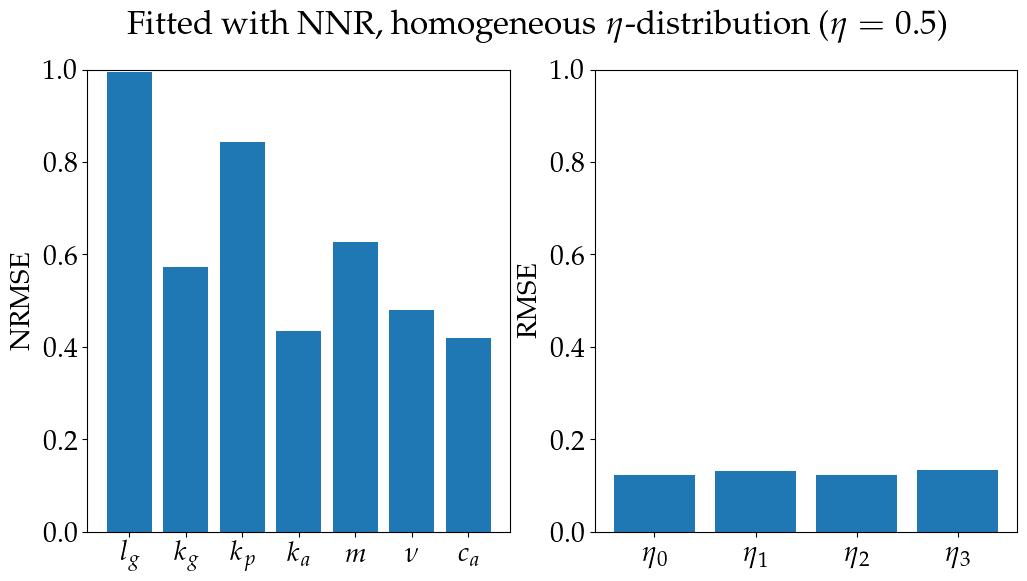

In [48]:
#make diagramm of nmse and mse_eta next to each other. both bars should have the same y axis
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].bar(param_keys, nmse_eta05.values())
ax[0].set_ylim((0,1))
ax[0].set_ylabel('NRMSE')
eta_labels = ['$\eta_0$','$\eta_1$','$\eta_2$','$\eta_3$']
ax[1].bar(eta_labels, mse_eta_eta05.values())
ax[1].set_ylim((0,1))
fig.suptitle('Fitted with NNR, homogeneous $\eta$-distribution ($\eta=0.5$)', fontsize=plt.rcParams['axes.titlesize'], fontweight='bold')
ax[1].set_ylabel('RMSE')
plt.savefig('../../figures/results/etasweep_rec_mse_eta05.png')

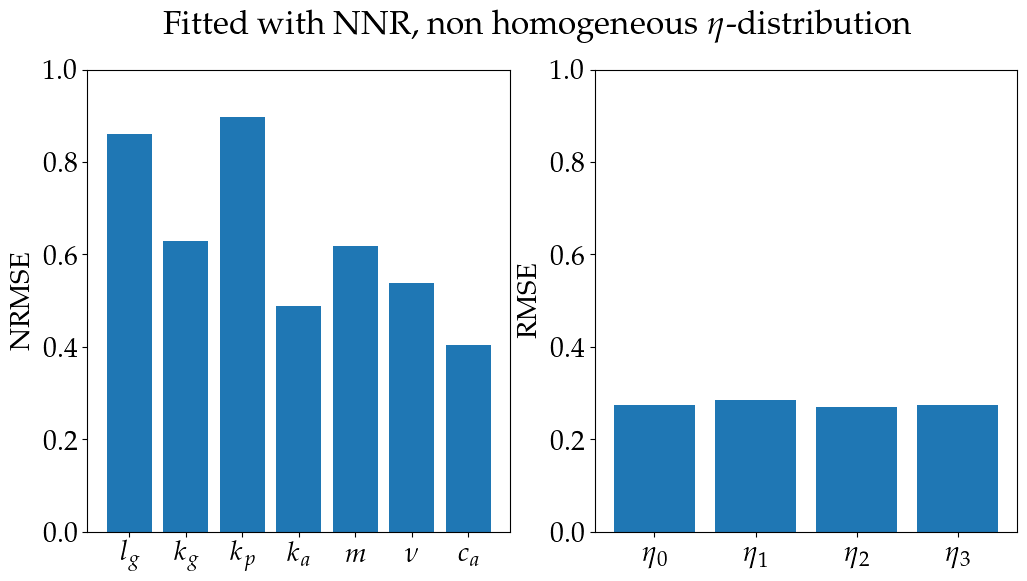

In [49]:
fig,ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].bar(param_keys, nmse_var.values())
ax[0].set_ylim((0,1))
ax[0].set_ylabel('NRMSE')
ax[1].bar(eta_labels, mse_eta_var.values())
#same y axis
ax[1].set_ylim((0,1))
ax[1].set_ylabel('RMSE')
fig.suptitle('Fitted with NNR, non homogeneous $\eta$-distribution', fontsize=plt.rcParams['axes.titlesize'], fontweight='bold')
plt.savefig('../../figures/results/etasweep_rec_mse_var.png')

In [50]:
eta0_real_eta05, eta0_fit_eta05, eta0_err_eta05, loss_eta05 = get_eta_sweep(params_sweep_eta05,orientation=0.5)
loss_eta05 = np.array(loss_eta05,dtype=float)
eta0_real_var, eta0_fit_var, eta0_err_var, loss_var = get_eta_sweep(params_sweep_var)
loss_var = np.array(loss_var,dtype=float)

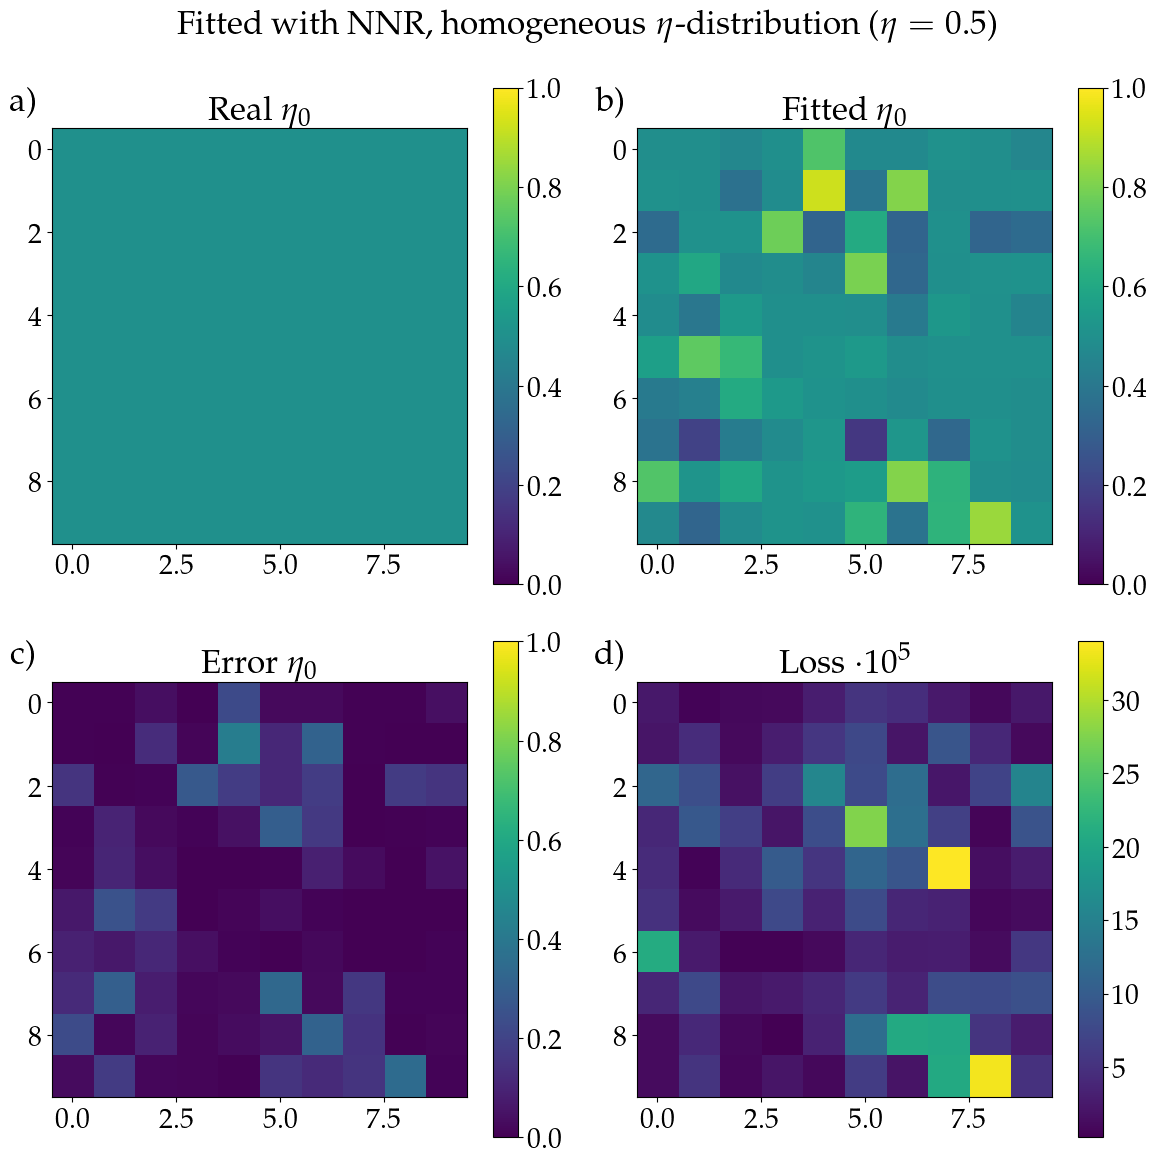

In [51]:
# Plotting
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

# Real eta0
im = ax[0, 0].imshow(eta0_real_eta05, vmin=0, vmax=1)
ax[0, 0].set_title('Real $\eta_0$')
fig.colorbar(im, ax=ax[0, 0])
ax[0, 0].annotate('a)', xy=(-.1, 1.1), xycoords='axes fraction', fontsize=plt.rcParams['axes.titlesize'], 
                  fontweight='normal', ha='left', va='top')

# Fitted eta0
im = ax[0, 1].imshow(eta0_fit_eta05, vmin=0, vmax=1)
ax[0, 1].set_title('Fitted $\eta_0$')
fig.colorbar(im, ax=ax[0, 1])
ax[0, 1].annotate('b)', xy=(-.1, 1.1), xycoords='axes fraction', fontsize=plt.rcParams['axes.titlesize'], 
                  fontweight='normal', ha='left', va='top')

# Error eta0
im = ax[1, 0].imshow(eta0_err_eta05, vmin=0, vmax=1)
ax[1, 0].set_title('Error $\eta_0$')
fig.colorbar(im, ax=ax[1, 0])
ax[1, 0].annotate('c)', xy=(-.1, 1.1), xycoords='axes fraction', fontsize=plt.rcParams['axes.titlesize'], 
                  fontweight='normal', ha='left', va='top')

# Loss
im = ax[1, 1].imshow(loss_eta05 * 10**5)
ax[1, 1].set_title('Loss $\cdot 10^5$')
fig.colorbar(im, ax=ax[1, 1])
ax[1, 1].annotate('d)', xy=(-.1, 1.1), xycoords='axes fraction', fontsize=plt.rcParams['axes.titlesize'], 
                  fontweight='normal', ha='left', va='top')


fig.suptitle('Fitted with NNR, homogeneous $\eta$-distribution ($\eta=0.5$)', fontsize=plt.rcParams['axes.titlesize'], fontweight='bold')
# Adjust layout
plt.tight_layout()
plt.savefig('../../figures/results/etasweep_rec_eta05.png')
plt.show()

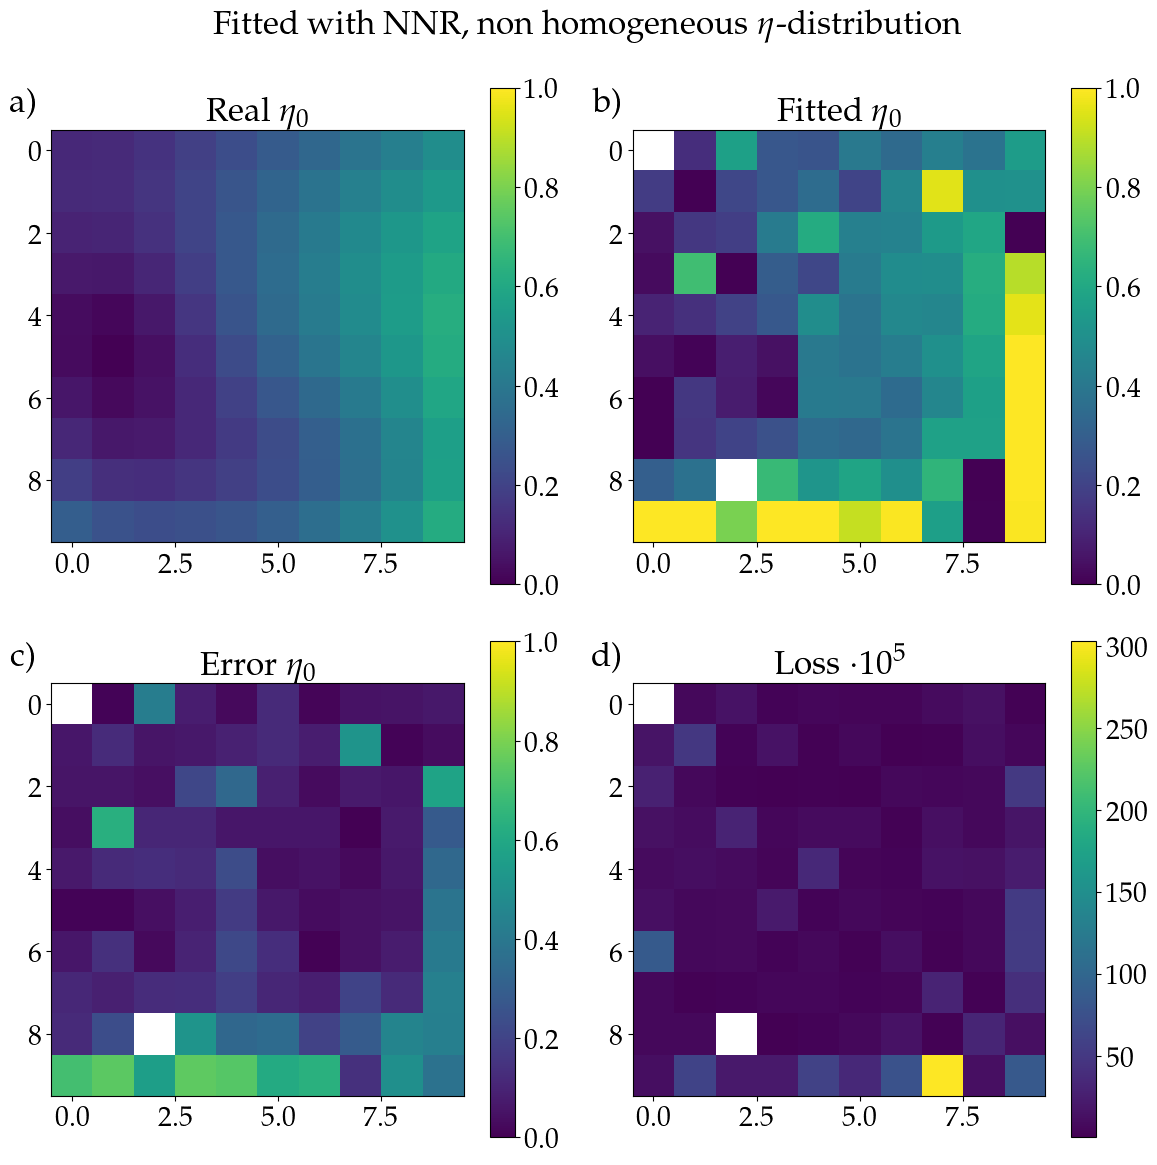

In [52]:
# Plotting
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

# Real eta0
im = ax[0, 0].imshow(eta0_real_var, vmin=0, vmax=1)
ax[0, 0].set_title('Real $\eta_0$')
fig.colorbar(im, ax=ax[0, 0])
ax[0, 0].annotate('a)', xy=(-.1, 1.1), xycoords='axes fraction', fontsize=plt.rcParams['axes.titlesize'], 
                  fontweight='normal', ha='left', va='top')

# Fitted eta0
im = ax[0, 1].imshow(eta0_fit_var, vmin=0, vmax=1)
ax[0, 1].set_title('Fitted $\eta_0$')
fig.colorbar(im, ax=ax[0, 1])
ax[0, 1].annotate('b)', xy=(-.1, 1.1), xycoords='axes fraction', fontsize=plt.rcParams['axes.titlesize'], 
                  fontweight='normal', ha='left', va='top')

# Error eta0
im = ax[1, 0].imshow(eta0_err_var, vmin=0, vmax=1)
ax[1, 0].set_title('Error $\eta_0$')
fig.colorbar(im, ax=ax[1, 0])
ax[1, 0].annotate('c)', xy=(-.1, 1.1), xycoords='axes fraction', fontsize=plt.rcParams['axes.titlesize'], 
                  fontweight='normal', ha='left', va='top')

# Loss
im = ax[1, 1].imshow(loss_var * 10**5)
ax[1, 1].set_title('Loss $\cdot 10^5$')
fig.colorbar(im, ax=ax[1, 1])
ax[1, 1].annotate('d)', xy=(-.1, 1.1), xycoords='axes fraction', fontsize=plt.rcParams['axes.titlesize'], 
                  fontweight='normal', ha='left', va='top')

fig.suptitle('Fitted with NNR, non homogeneous $\eta$-distribution', fontsize=plt.rcParams['axes.titlesize'], fontweight='bold')
# Adjust layout
plt.tight_layout()
plt.savefig('../../figures/results/etasweep_rec_eta_var.png')
plt.show()

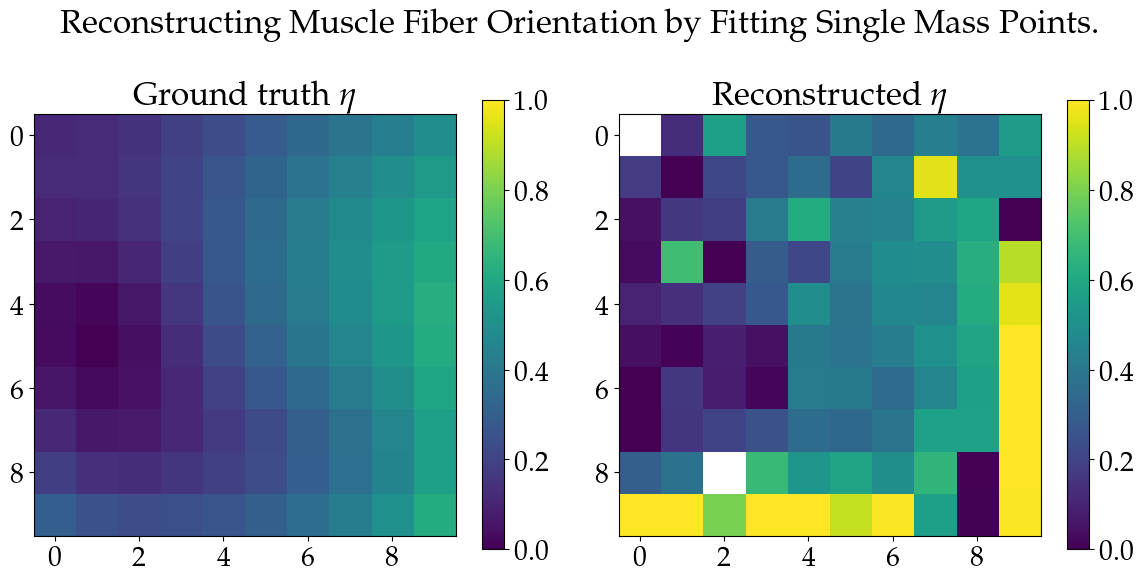

In [53]:
# make plot of two heatmaps
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Real eta0
im = ax[0].imshow(eta0_real_var, vmin=0, vmax=1)
ax[0].set_title('Ground truth $\eta$')
fig.colorbar(im, ax=ax[0])

# Fitted eta0
im = ax[1].imshow(eta0_fit_var, vmin=0, vmax=1)
ax[1].set_title('Reconstructed $\eta$')
fig.colorbar(im, ax=ax[1])

fig.suptitle('Reconstructing Muscle Fiber Orientation by Fitting Single Mass Points.', fontsize=plt.rcParams['axes.titlesize'], fontweight='bold')
# Adjust layout
plt.tight_layout()
plt.savefig('../../figures/results/etasweep_rec_eta05_poster.png',dpi=300)
plt.show()


In [54]:
def get_best_stencil(params_sweep_var_stencil):

    params_sweep_var_stencil_temp = params_sweep_var_stencil
    params_sweep_var_stencil_temp[:,:,:,1] = np.where(
        np.vectorize(lambda x: isinstance(x, dict))(params_sweep_var_stencil_temp[:,:,:,1]),
        np.nan,
        params_sweep_var_stencil[:,:,:,1],
    )
    params_sweep_var_stencil_temp[:,:,:,1] =params_sweep_var_stencil[:,:,:,1]#.astype(float)
    # Step 1: Extract the loss values from b
    loss_values = params_sweep_var_stencil_temp[:,:,:,1]  # This gives you the 10x10 loss matrix
    param_values = params_sweep_var_stencil_temp[:,:,:,0]
    
    best_k = np.full((10,10,2),np.nan,dtype = object)

    for i in range(10):
        for j in range(10):
            if all(x != x for x in loss_values[i,j,:]):
                pass
            
            else:
            
                best_k[i,j,1] = loss_values[i,j,:][np.nanargmin(loss_values[i,j,:])]
                best_k[i,j,0] = param_values[i,j,:][np.nanargmin(loss_values[i,j,:])]
    best_k = np.array([
    [[{'key': np.nan} if isinstance(x, float) and np.isnan(x) else x for x in pair]
        for pair in row]
    for row in best_k], dtype=object) 
    return best_k

mse_eta05, nmse_eta05, mse_eta_eta05 = get_mse(params_sweep_eta05,orientation=0.5)
mse_var, nmse_var, mse_eta_var = get_mse(params_sweep_var)

In [55]:
params_sweep_var_stencil = np.load('../data/SpringMassModel/EtaSweep/eta_sweepT_Stencil_l_var_1.npy',allow_pickle=True)
params_sweep_var_stencil = get_best_stencil(params_sweep_var_stencil)

params_sweep_eta05_stencil = np.load('../data/SpringMassModel/EtaSweep/eta_sweepT_Stencil_l_eta05_1.npy',allow_pickle=True)
params_sweep_eta05_stencil = get_best_stencil(params_sweep_eta05_stencil)
print(params_sweep_var_stencil[0,0,1])

8.502212978100943e-08


In [56]:
mse_var_stencil, nmse_var_stencil, mse_eta_var_stencil = get_mse(params_sweep_var_stencil)
mse_eta05_stencil, nmse_eta05_stencil, mse_eta_eta05_stencil = get_mse(params_sweep_eta05_stencil,orientation=0.5)

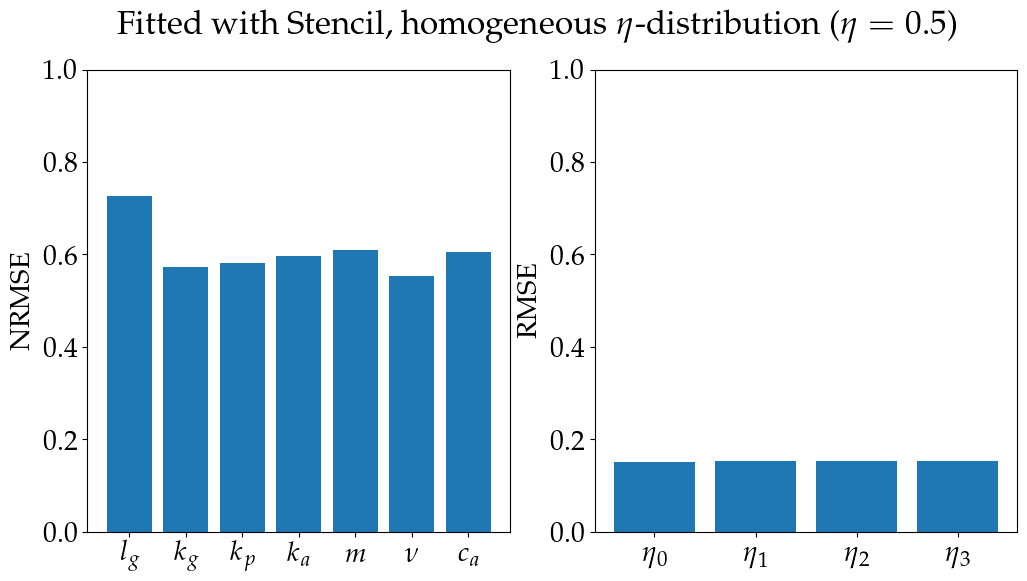

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].bar(param_keys, nmse_eta05_stencil.values())
ax[0].set_ylim((0,1))
ax[0].set_ylabel('NRMSE')
eta_labels = ['$\eta_0$','$\eta_1$','$\eta_2$','$\eta_3$']
ax[1].bar(eta_labels, mse_eta_eta05_stencil.values())
ax[1].set_ylim((0,1))
ax[1].set_ylabel('RMSE')
fig.suptitle('Fitted with Stencil, homogeneous $\eta$-distribution ($\eta=0.5$)', fontsize=plt.rcParams['axes.titlesize'], fontweight='bold')
plt.savefig('../../figures/results/etasweep_stencil_mse_eta05.png')

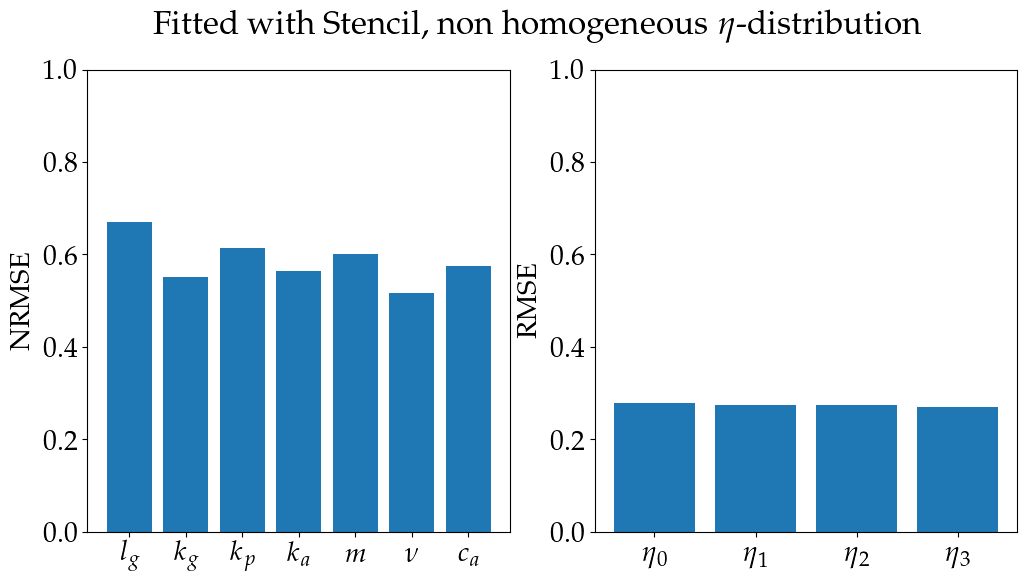

In [58]:
fig,ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].bar(param_keys, nmse_var_stencil.values())
ax[0].set_ylim((0,1))
ax[0].set_ylabel('NRMSE')
ax[1].bar(eta_labels, mse_eta_var_stencil.values())
#same y axis
ax[1].set_ylim((0,1))
ax[1].set_ylabel('RMSE')
fig.suptitle('Fitted with Stencil, non homogeneous $\eta$-distribution', fontsize=plt.rcParams['axes.titlesize'], fontweight='bold')
plt.savefig('../../figures/results/etasweep_stencil_mse_var.png')

In [59]:
eta0_real_eta05_Stencil, eta0_fit_eta05_Stencil, eta0_err_eta05_Stencil, loss_eta05_Stencil = get_eta_sweep(params_sweep_eta05_stencil,orientation=0.5)
loss_eta05_Stencil = np.array(loss_eta05_Stencil,dtype=float)
eta0_real_var_Stencil, eta0_fit_var_Stencil, eta0_err_var_Stencil, loss_var_Stencil = get_eta_sweep(params_sweep_var_stencil)
loss_var_Stencil = np.array(loss_var_Stencil,dtype=float)

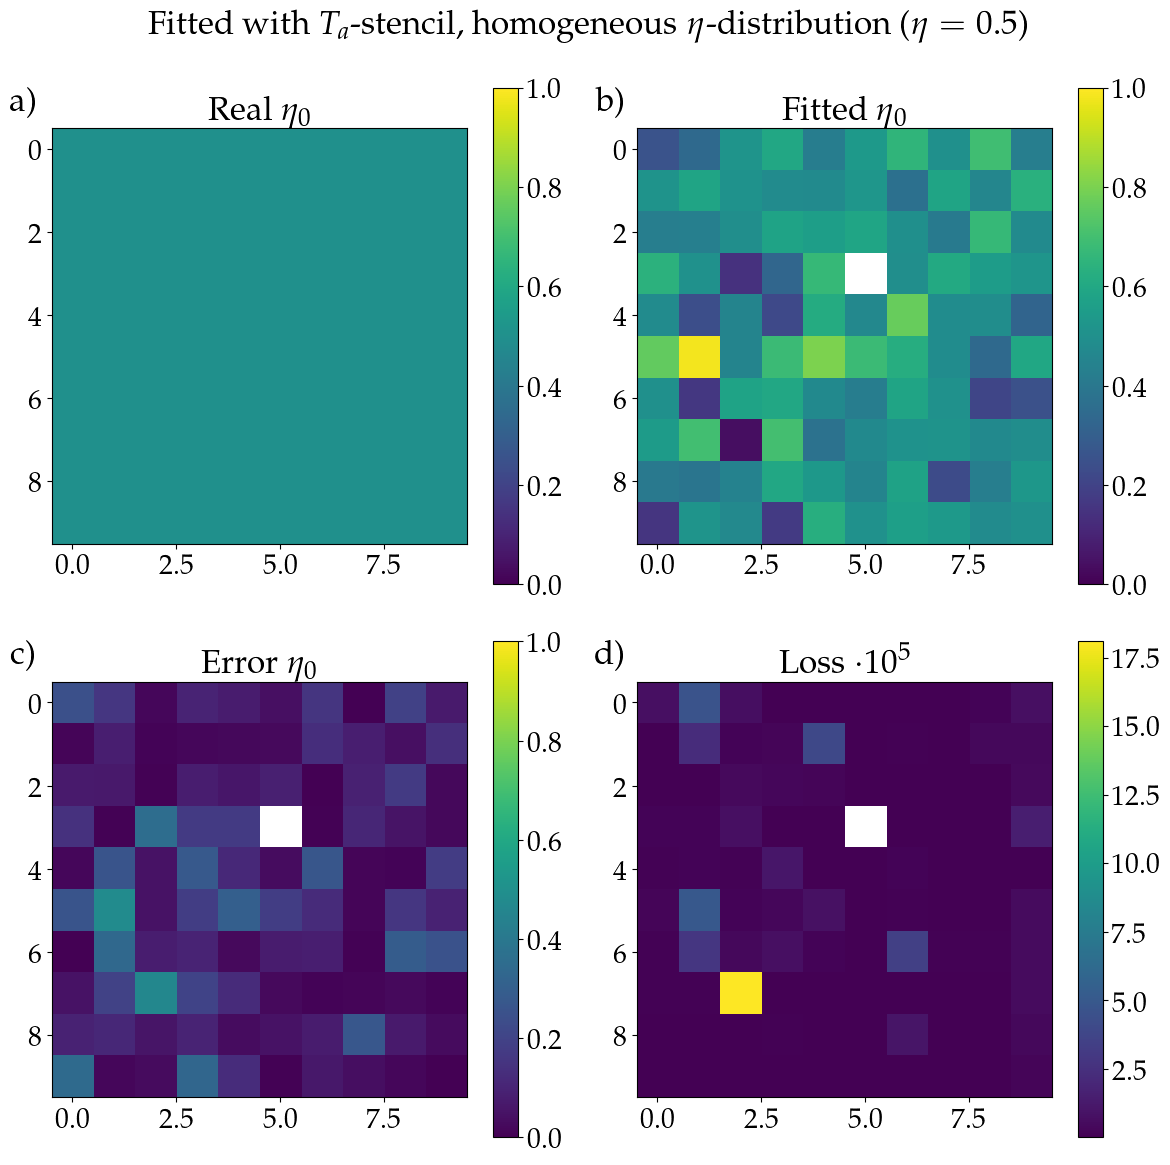

In [60]:
# Plotting
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

# Real eta0
im = ax[0, 0].imshow(eta0_real_eta05_Stencil, vmin=0, vmax=1)
ax[0, 0].set_title('Real $\eta_0$')
fig.colorbar(im, ax=ax[0, 0])
ax[0, 0].annotate('a)', xy=(-.1, 1.1), xycoords='axes fraction', fontsize=plt.rcParams['axes.titlesize'], 
                  fontweight='normal', ha='left', va='top')

# Fitted eta0
im = ax[0, 1].imshow(eta0_fit_eta05_Stencil, vmin=0, vmax=1)
ax[0, 1].set_title('Fitted $\eta_0$')
fig.colorbar(im, ax=ax[0, 1])
ax[0, 1].annotate('b)', xy=(-.1, 1.1), xycoords='axes fraction', fontsize=plt.rcParams['axes.titlesize'], 
                  fontweight='normal', ha='left', va='top')

# Error eta0
im = ax[1, 0].imshow(eta0_err_eta05_Stencil, vmin=0, vmax=1)
ax[1, 0].set_title('Error $\eta_0$')
fig.colorbar(im, ax=ax[1, 0])
ax[1, 0].annotate('c)', xy=(-.1, 1.1), xycoords='axes fraction', fontsize=plt.rcParams['axes.titlesize'], 
                  fontweight='normal', ha='left', va='top')

# Loss
im = ax[1, 1].imshow(loss_eta05_Stencil * 10**5)
ax[1, 1].set_title('Loss $\cdot 10^5$')
fig.colorbar(im, ax=ax[1, 1])
ax[1, 1].annotate('d)', xy=(-.1, 1.1), xycoords='axes fraction', fontsize=plt.rcParams['axes.titlesize'], 
                  fontweight='normal', ha='left', va='top')

fig.suptitle('Fitted with $T_a$-stencil, homogeneous $\eta$-distribution ($\eta=0.5$)', fontsize=plt.rcParams['axes.titlesize'], fontweight='bold')
# Adjust layout
plt.tight_layout()
plt.savefig('../../figures/results/etasweep_stencil_eta05.png')
plt.show()

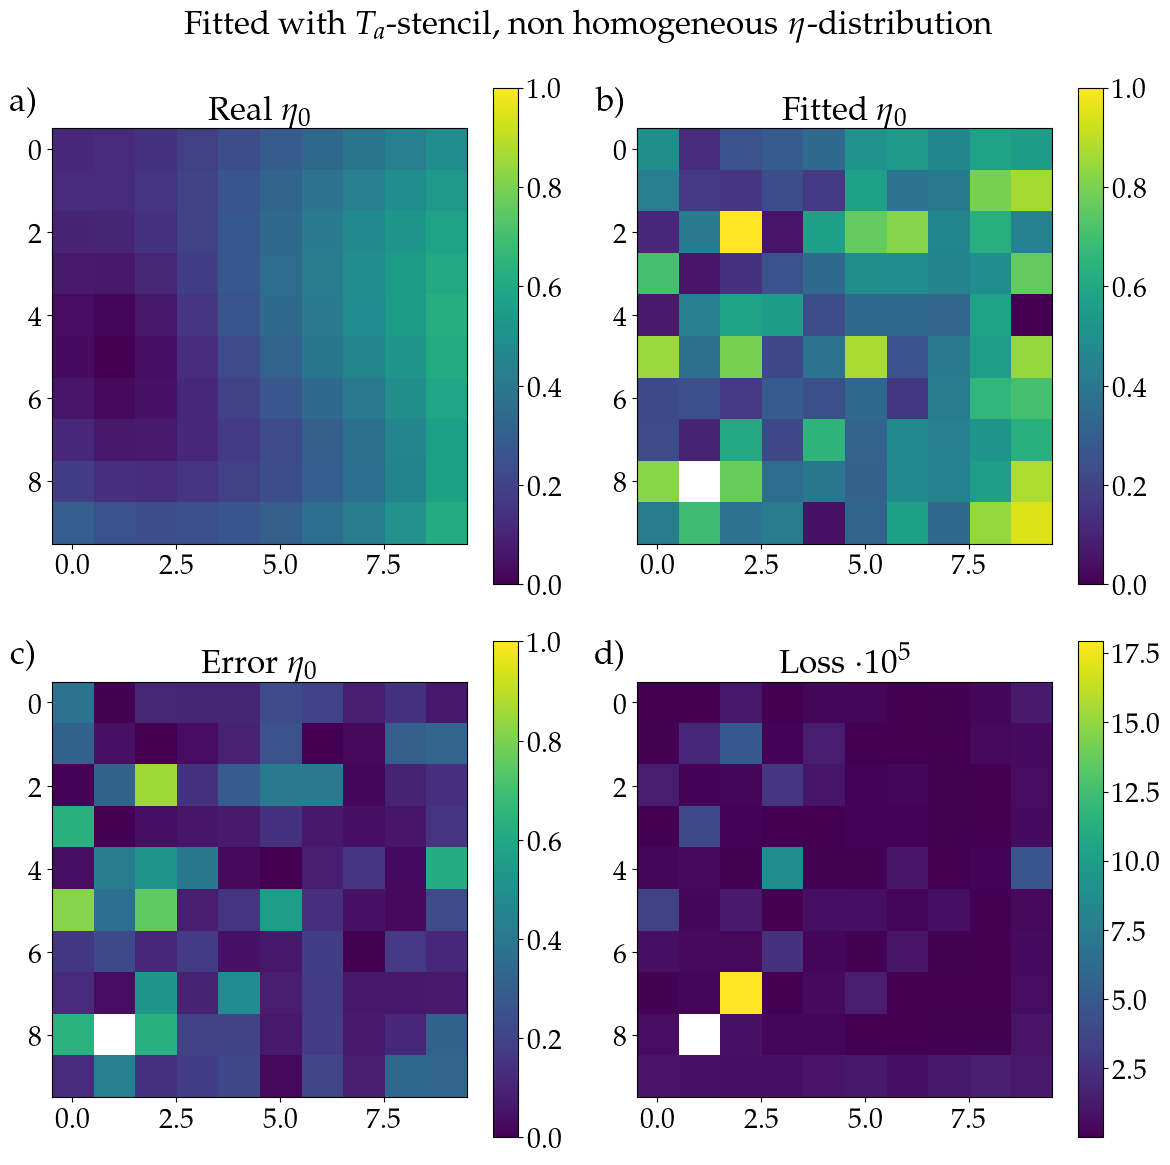

In [61]:
# Plotting
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

# Real eta0
im = ax[0, 0].imshow(eta0_real_var_Stencil, vmin=0, vmax=1)
ax[0, 0].set_title('Real $\eta_0$')
fig.colorbar(im, ax=ax[0, 0])
ax[0, 0].annotate('a)', xy=(-.1, 1.1), xycoords='axes fraction', fontsize=plt.rcParams['axes.titlesize'], 
                  fontweight='normal', ha='left', va='top')

# Fitted eta0
im = ax[0, 1].imshow(eta0_fit_var_Stencil, vmin=0, vmax=1)
ax[0, 1].set_title('Fitted $\eta_0$')
fig.colorbar(im, ax=ax[0, 1])
ax[0, 1].annotate('b)', xy=(-.1, 1.1), xycoords='axes fraction', fontsize=plt.rcParams['axes.titlesize'], 
                  fontweight='normal', ha='left', va='top')

# Error eta0
im = ax[1, 0].imshow(eta0_err_var_Stencil, vmin=0, vmax=1)
ax[1, 0].set_title('Error $\eta_0$')
fig.colorbar(im, ax=ax[1, 0])
ax[1, 0].annotate('c)', xy=(-.1, 1.1), xycoords='axes fraction', fontsize=plt.rcParams['axes.titlesize'], 
                  fontweight='normal', ha='left', va='top')

# Loss
im = ax[1, 1].imshow(loss_var_Stencil * 10**5)
ax[1, 1].set_title('Loss $\cdot 10^5$')
fig.colorbar(im, ax=ax[1, 1])
ax[1, 1].annotate('d)', xy=(-.1, 1.1), xycoords='axes fraction', fontsize=plt.rcParams['axes.titlesize'], 
                  fontweight='normal', ha='left', va='top')

fig.suptitle('Fitted with $T_a$-stencil, non homogeneous $\eta$-distribution', fontsize=plt.rcParams['axes.titlesize'], fontweight='bold')
# Adjust layout
plt.tight_layout()
plt.savefig('../../figures/results/etasweep_stencil_eta_var.png')
plt.show()